In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

# idee 
relation between match and same field study , crete coloun same_field 

evaluer l'attribut que els hommes recherhe le plus

pareil femme

evaluer les hommes qui recoivent le plus de oui

pareil cher les femmes 

evaluer les match de ceux qui one une bonne idee de eux meme

In [89]:
df = pd.read_csv("Speed+Dating+Data.csv", encoding = "unicode-escape'" )
len(df.columns)
df['same_field'] = [ 1 if val['field_cd']== df[df['iid']==val['pid']]['field_cd'].max() else 0 for ind, val in df.iterrows() ]
df['same_career'] = [ 1 if val['career_c']== df[df['iid']==val['pid']]['career_c'].max() else 0 for ind, val in df.iterrows() ]

In [90]:
desc = df.describe(include = 'all')
desc = desc.drop('unique')
desc = desc.drop('top')
desc = desc.drop('freq')
desc

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,same_field,same_career
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,8378.000000,8378.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611,0.114586,0.178324
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988,0.318540,0.382808
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000,0.000000,0.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,0.000000,0.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000,0.000000,0.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000,0.000000,0.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000


In [91]:
desc.loc['unique']=[df[col].unique().size for col in desc.columns]
desc.loc['Nan'] = [df[col].isna().sum() for col in desc.columns]
desc.loc['Nan_percentage'] = [df[col].isna().sum()/len(df)*100 for col in desc.columns]
desc.loc['type'] = [df[col].dtypes for col in desc.columns]

In [93]:
matrice_same_fied_match = [[df[(df['same_field']==1 ) and (df['match']==1) ]],[]]

count               8378.0
mean              0.114586
std                0.31854
min                    0.0
25%                    0.0
50%                    0.0
75%                    0.0
max                    1.0
unique                 2.0
Nan                    0.0
Nan_percentage         0.0
type                 int64
Name: same_field, dtype: object

In [92]:
for i in range(15,len(df.columns),15):
    display(desc.iloc[:,i-15:i])

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace
count,8378.0,8377.0,8378.0,8378.0,8378.0,8378.0,8378.0,8378.0,6532.0,8378.0,8378.0,8368.0,8378.0,8220.0,8378.0
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.19601,0.395799
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,5.491068,158.584899,0.370947,0.303539,0.489051
min,1.0,1.0,0.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.83,0.0
25%,154.0,4.0,0.0,8.0,2.0,7.0,14.0,4.0,4.0,4.0,4.0,154.0,0.0,-0.02,0.0
50%,281.0,8.0,1.0,16.0,2.0,11.0,18.0,8.0,9.0,8.0,8.0,281.0,0.0,0.21,0.0
75%,407.0,13.0,1.0,26.0,2.0,15.0,20.0,13.0,14.0,13.0,13.0,408.0,0.0,0.43,1.0
max,552.0,22.0,1.0,44.0,2.0,21.0,22.0,22.0,22.0,22.0,22.0,552.0,1.0,0.91,1.0
unique,551.0,23.0,2.0,44.0,2.0,21.0,15.0,22.0,23.0,22.0,22.0,552.0,2.0,156.0,2.0
Nan,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1846.0,0.0,0.0,10.0,0.0,158.0,0.0


,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o
count,8274.0,8305.0,8289.0,8289.0,8289.0,8280.0,8271.0,8249.0,8378.0,8166.0,8091.0,8072.0,8018.0,7656.0,7302.0
mean,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.84593,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.47487
std,3.563648,1.230689,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,0.493515,1.950305,1.740575,1.550501,1.954078,1.79408,2.156163
min,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,24.0,2.0,15.0,15.0,17.39,15.0,5.0,9.52,0.0,5.0,6.0,6.0,5.0,6.0,4.0
50%,26.0,2.0,20.0,18.37,20.0,18.0,10.0,10.64,0.0,6.0,7.0,7.0,7.0,7.0,6.0
75%,28.0,4.0,25.0,20.0,23.81,20.0,15.0,16.0,1.0,8.0,8.0,8.0,8.0,8.0,7.0
max,55.0,6.0,100.0,60.0,50.0,50.0,53.0,30.0,1.0,10.5,10.0,10.0,11.0,10.0,10.0
unique,25.0,6.0,95.0,79.0,66.0,72.0,83.0,86.0,2.0,19.0,15.0,18.0,18.0,16.0,16.0
Nan,104.0,73.0,89.0,89.0,89.0,98.0,107.0,129.0,0.0,212.0,287.0,306.0,360.0,722.0,1076.0


,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income
count,8128.0,8060.0,7993.0,8283.0,8315,8296.0,4914,3133,3583,8315.0,8299.0,8299.0,8299,7314,4279
mean,6.134498,5.208251,1.960215,26.358928,NaN,7.662488,NaN,NaN,NaN,2.757186,3.784793,3.651645,NaN,NaN,NaN
std,1.841258,2.129354,0.245925,3.566763,NaN,3.758935,NaN,NaN,NaN,1.230905,2.845708,2.805237,NaN,NaN,NaN
min,0.0,0.0,1.0,18.0,NaN,1.0,NaN,NaN,NaN,1.0,0.0,1.0,NaN,NaN,NaN
25%,5.0,4.0,2.0,24.0,NaN,5.0,NaN,NaN,NaN,2.0,1.0,1.0,NaN,NaN,NaN
50%,6.0,5.0,2.0,26.0,NaN,8.0,NaN,NaN,NaN,2.0,3.0,3.0,NaN,NaN,NaN
75%,7.0,7.0,2.0,28.0,NaN,10.0,NaN,NaN,NaN,4.0,6.0,6.0,NaN,NaN,NaN
max,10.0,10.0,8.0,55.0,NaN,18.0,NaN,NaN,NaN,6.0,10.0,10.0,NaN,NaN,NaN
unique,19.0,20.0,8.0,25.0,260,19.0,242,69,116,6.0,12.0,11.0,270,410,262
Nan,250.0,318.0,385.0,95.0,63,82.0,3464,5245,4795,63.0,79.0,79.0,79,1064,4099


,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading
count,8299.0,8281.0,8299.0,8289,8240.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0
mean,2.122063,5.006762,2.158091,NaN,5.277791,6.425232,4.575491,6.245813,7.783829,6.985781,6.714544,5.737077,3.881191,5.745993,7.678515
std,1.407181,1.444531,1.105246,NaN,3.30952,2.619024,2.801874,2.418858,1.754868,2.052232,2.263407,2.570207,2.620507,2.502218,2.006565
min,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,1.0,4.0,1.0,NaN,2.0,4.0,2.0,5.0,7.0,6.0,5.0,4.0,2.0,4.0,7.0
50%,2.0,5.0,2.0,NaN,6.0,7.0,4.0,6.0,8.0,7.0,7.0,6.0,3.0,6.0,8.0
75%,2.0,6.0,3.0,NaN,7.0,9.0,7.0,8.0,9.0,9.0,8.0,8.0,6.0,8.0,9.0
max,6.0,7.0,7.0,NaN,17.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,14.0,10.0,13.0
unique,7.0,8.0,8.0,368,18.0,11.0,11.0,11.0,11.0,12.0,12.0,12.0,13.0,12.0,12.0
Nan,79.0,97.0,79.0,89,138.0,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.0


,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
count,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8299.0,8277.0,1800.0,8299.0,8299.0,8299.0,8289.0,8279.0,8257.0
mean,5.304133,6.776118,7.919629,6.825401,7.851066,5.631281,4.339197,5.534131,5.570556,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111
std,2.529135,2.235152,1.700927,2.156283,1.791827,2.608913,2.717612,1.734059,4.762569,12.587674,7.0467,6.783003,6.085239,6.124888,6.362154
min,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.0,5.0,7.0,5.0,7.0,4.0,2.0,5.0,2.0,15.0,15.0,17.39,15.0,5.0,9.52
50%,6.0,7.0,8.0,7.0,8.0,6.0,4.0,6.0,4.0,20.0,18.18,20.0,18.0,10.0,10.64
75%,7.0,9.0,9.0,8.0,9.0,8.0,7.0,7.0,8.0,25.0,20.0,23.81,20.0,15.0,16.0
max,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,20.0,100.0,60.0,50.0,50.0,53.0,30.0
unique,11.0,12.0,11.0,12.0,11.0,11.0,12.0,11.0,19.0,95.0,79.0,66.0,72.0,83.0,86.0
Nan,79.0,79.0,79.0,79.0,79.0,79.0,79.0,101.0,6578.0,79.0,79.0,79.0,89.0,99.0,121.0


,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1
count,6489.0,6489.0,6489.0,6489.0,6489.0,6467.0,8299.0,8299.0,8299.0,8299.0,8289.0,8289.0,8273.0,8273.0,8273.0
mean,26.39436,11.071506,12.636308,15.566805,9.780089,11.014845,30.362192,13.273691,14.416891,18.42262,11.744499,11.854817,7.084733,8.294935,7.70446
std,16.297045,6.659233,6.717476,7.328256,6.998428,6.06015,16.249937,6.976775,6.263304,6.577929,6.886532,6.167314,1.395783,1.40746,1.564321
min,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0
25%,10.0,6.0,8.0,10.0,5.0,7.0,20.0,10.0,10.0,15.0,6.0,10.0,6.0,8.0,7.0
50%,25.0,10.0,10.0,15.0,10.0,10.0,25.0,15.0,15.0,20.0,10.0,10.0,7.0,8.0,8.0
75%,35.0,15.0,16.0,20.0,15.0,15.0,40.0,18.75,20.0,20.0,15.0,15.63,8.0,9.0,9.0
max,95.0,35.0,35.0,45.0,50.0,40.0,100.0,50.0,40.0,50.0,50.0,30.0,10.0,10.0,10.0
unique,34.0,25.0,25.0,23.0,26.0,26.0,88.0,81.0,79.0,75.0,78.0,74.0,10.0,10.0,10.0
Nan,1889.0,1889.0,1889.0,1889.0,1889.0,1911.0,79.0,79.0,79.0,79.0,89.0,89.0,105.0,105.0,105.0


,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like
count,8273.0,8273.0,4906.0,4906.0,4906.0,4906.0,4906.0,8378.0,8176.0,8101.0,8082.0,8028.0,7666.0,7311.0,8138.0
mean,8.403965,7.578388,6.941908,7.927232,8.284346,7.426213,7.617611,0.419909,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,6.134087
std,1.076608,1.778315,1.498653,1.627054,1.283657,1.779129,1.773094,0.493573,1.950169,1.740315,1.550453,1.953702,1.794055,2.156363,1.841285
min,3.0,2.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,8.0,7.0,6.0,7.0,8.0,6.0,7.0,0.0,5.0,6.0,6.0,5.0,6.0,4.0,5.0
50%,8.0,8.0,7.0,8.0,8.0,8.0,8.0,0.0,6.0,7.0,7.0,7.0,7.0,6.0,6.0
75%,9.0,9.0,8.0,9.0,9.0,9.0,9.0,1.0,8.0,8.0,8.0,8.0,8.0,7.0,7.0
max,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
unique,9.0,10.0,10.0,11.0,9.0,10.0,11.0,2.0,18.0,15.0,18.0,17.0,16.0,16.0,19.0
Nan,105.0,105.0,3472.0,3472.0,3472.0,3472.0,3472.0,0.0,202.0,277.0,296.0,350.0,712.0,1067.0,240.0


,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2
count,8069.0,8003.0,7205.0,4096.0,4096.0,4096.0,4096.0,4096.0,4096.0,4000.0,4000.0,4000.0,4000.0,4000.0,7463.0
mean,5.207523,0.948769,3.207814,20.791624,15.434255,17.243708,15.260869,11.144619,12.457925,7.21125,8.082,8.25775,7.6925,7.58925,5.71151
std,2.129565,0.989889,2.444813,12.968524,6.915322,6.59642,5.356969,5.514028,5.921789,1.41545,1.455741,1.179317,1.626839,1.793136,1.820764
min,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,4.0,3.0,2.0,1.0
25%,4.0,0.0,2.0,14.81,10.0,10.0,10.0,7.0,9.0,7.0,7.0,8.0,7.0,7.0,5.0
50%,5.0,0.0,3.0,17.65,15.79,18.42,15.91,10.0,12.5,7.0,8.0,8.0,8.0,8.0,6.0
75%,7.0,2.0,4.0,25.0,20.0,20.0,20.0,15.0,16.28,8.0,9.0,9.0,9.0,9.0,7.0
max,10.0,8.0,18.0,95.0,50.0,40.0,40.0,23.81,30.0,10.0,10.0,10.0,10.0,10.0,10.0
unique,20.0,9.0,18.0,74.0,68.0,65.0,65.0,77.0,77.0,10.0,12.0,9.0,9.0,10.0,11.0
Nan,309.0,375.0,1173.0,4282.0,4282.0,4282.0,4282.0,4282.0,4282.0,4378.0,4378.0,4378.0,4378.0,4378.0,915.0


,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2
count,7463.0,7433.0,1984.0,1955.0,1984.0,1984.0,1955.0,1974.0,7445.0,7463.0,7463.0,7463.0,7463.0,7463.0,5775.0
mean,1.843495,2.338087,32.819556,13.529923,15.293851,18.868448,7.286957,12.156028,26.217194,15.865084,17.813755,17.654765,9.913436,12.760263,26.806234
std,0.975662,0.63124,17.15527,7.977482,7.292868,8.535963,6.125187,8.241906,14.388694,6.658494,6.535894,6.129746,5.67555,6.651547,16.402836
min,1.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,6.0
25%,1.0,2.0,20.0,10.0,10.0,10.0,0.0,5.0,16.67,10.0,15.0,15.0,5.0,10.0,10.0
50%,1.0,2.0,30.0,10.0,15.0,20.0,5.0,10.0,20.0,16.67,19.05,18.37,10.0,13.0,25.0
75%,3.0,3.0,40.0,20.0,20.0,24.0,10.0,20.0,30.0,20.0,20.0,20.0,15.0,16.67,40.0
max,3.0,3.0,80.0,40.0,50.0,50.0,20.0,40.0,85.0,50.0,40.0,50.0,22.22,35.0,100.0
unique,4.0,4.0,17.0,17.0,17.0,17.0,11.0,15.0,78.0,72.0,68.0,75.0,74.0,83.0,28.0
Nan,915.0,945.0,6394.0,6423.0,6394.0,6394.0,6423.0,6404.0,933.0,915.0,915.0,915.0,915.0,915.0,2603.0


,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2
count,5775.0,5775.0,5775.0,5775.0,5775.0,5775.0,5775.0,5775.0,5775.0,5775.0,5775.0,7463.0,7463.0,7463.0,7463.0
mean,11.929177,12.10303,15.16381,9.342511,11.320866,29.344369,13.89823,13.958265,17.967233,11.909735,12.887976,7.125285,7.931529,8.238912,7.602171
std,6.401556,5.990607,7.290107,5.856329,6.296155,14.551171,6.17169,5.398621,6.100307,6.313281,5.615691,1.37139,1.503236,1.18028,1.5482
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,4.0,1.0
25%,8.0,8.0,9.0,5.0,7.0,19.15,10.0,10.0,15.0,10.0,10.0,7.0,7.0,8.0,7.0
50%,10.0,10.0,15.0,10.0,10.0,25.0,15.0,15.0,18.52,10.0,13.95,7.0,8.0,8.0,8.0
75%,15.0,15.0,20.0,10.0,15.0,38.46,19.23,17.39,20.0,15.09,16.515,8.0,9.0,9.0,9.0
max,35.0,40.0,50.0,35.0,40.0,85.0,40.0,30.77,40.0,50.0,30.0,10.0,10.0,10.0,10.0
unique,23.0,26.0,23.0,25.0,23.0,82.0,68.0,70.0,62.0,77.0,65.0,10.0,10.0,8.0,11.0
Nan,2603.0,2603.0,2603.0,2603.0,2603.0,2603.0,2603.0,2603.0,2603.0,2603.0,2603.0,915.0,915.0,915.0,915.0


,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3
count,7463.0,4377.0,4377.0,4377.0,4377.0,4377.0,3974.0,3974.0,3974.0,1496.0,668.0,3974.0,3974.0,3974.0,3974.0
mean,7.486802,6.827964,7.394106,7.838702,7.279415,7.332191,0.780825,0.981631,0.37695,1.230615,0.934132,24.384524,16.588583,19.411346,16.233415
std,1.744634,1.411096,1.588145,1.280936,1.647478,1.521854,1.611694,1.382139,0.484683,1.294557,0.753902,13.71212,7.471537,6.124502,5.163777
min,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7.0,6.0,6.0,7.0,6.0,6.0,0.0,0.0,0.0,1.0,1.0,15.22,10.0,16.67,14.81
50%,8.0,7.0,8.0,8.0,7.0,7.0,0.0,1.0,0.0,1.0,1.0,20.0,16.67,20.0,16.33
75%,9.0,8.0,8.0,9.0,8.0,8.0,1.0,1.0,1.0,1.0,1.0,30.0,20.0,20.0,20.0
max,10.0,10.0,10.0,10.0,10.0,10.0,21.0,9.0,1.0,9.0,4.0,80.0,65.0,45.0,30.0
unique,10.0,10.0,10.0,9.0,10.0,9.0,10.0,9.0,3.0,7.0,5.0,57.0,48.0,45.0,54.0
Nan,915.0,4001.0,4001.0,4001.0,4001.0,4001.0,4404.0,4404.0,4404.0,6882.0,7710.0,4404.0,4404.0,4404.0,4404.0


,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3
count,3974.0,3974.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2959.0,2959.0,2959.0,2959.0,2959.0,2959.0,2959.0
mean,10.898075,12.699142,31.330357,15.654266,16.679563,16.418155,7.823909,12.207837,25.610341,10.751267,11.524839,14.276783,9.207503,11.253802,24.970936
std,5.900697,6.557041,17.55154,9.336288,7.880088,7.231325,6.100502,8.615985,17.477134,5.740351,6.004222,6.927869,6.385852,6.516178,17.007669
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
25%,5.0,10.0,20.0,10.0,10.0,10.0,0.0,5.0,10.0,7.0,7.0,9.0,5.0,7.0,10.0
50%,10.0,14.29,25.0,15.0,18.0,17.0,10.0,10.0,20.0,10.0,10.0,12.0,9.0,10.0,20.0
75%,15.0,16.67,40.0,20.0,20.0,20.0,10.0,20.0,37.0,15.0,15.0,20.0,10.0,15.0,35.0
max,30.0,55.0,80.0,60.0,45.0,40.0,30.0,55.0,80.0,40.0,30.0,30.0,40.0,45.0,80.0
unique,57.0,54.0,22.0,14.0,15.0,17.0,14.0,16.0,24.0,17.0,17.0,16.0,21.0,17.0,24.0
Nan,4404.0,4404.0,6362.0,6362.0,6362.0,6362.0,6362.0,6362.0,5419.0,5419.0,5419.0,5419.0,5419.0,5419.0,5419.0


,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,2959.0,2959.0,2959.0,2959.0,2016.0,3974.0,3974.0,3974.0,3974.0,3974.0,2016.0,2016.0,2016.0,2016.0,2016.0
mean,10.923285,11.952687,14.959108,9.526191,11.96627,7.240312,8.093357,8.388777,7.658782,7.391545,6.81002,7.615079,7.93254,7.155258,7.048611
std,6.226283,7.01065,7.935509,6.403117,7.012067,1.576596,1.610309,1.459094,1.74467,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,4.0,1.0,1.0
25%,7.0,7.0,9.0,6.0,5.0,7.0,7.0,8.0,7.0,6.0,6.0,7.0,7.0,6.0,6.0
50%,10.0,10.0,15.0,10.0,10.0,7.0,8.0,8.0,8.0,8.0,7.0,8.0,8.0,7.0,7.0
75%,15.0,15.0,20.0,10.0,15.0,8.0,9.0,9.0,9.0,9.0,8.0,9.0,9.0,8.0,8.0
max,50.0,60.0,40.0,50.0,45.0,12.0,12.0,12.0,12.0,12.0,10.0,10.0,10.0,10.0,10.0
unique,14.0,18.0,17.0,18.0,13.0,11.0,11.0,10.0,11.0,12.0,10.0,10.0,8.0,11.0,10.0
Nan,5419.0,5419.0,5419.0,5419.0,6362.0,4404.0,4404.0,4404.0,4404.0,4404.0,6362.0,6362.0,6362.0,6362.0,6362.0


### Relation between match and corr interest

In [10]:
df_rated_act = df.groupby("iid")[["gender","sports","tvsports","exercise","dining","museums","art","hiking","gaming","clubbing","reading","tv","theater","movies","concerts","music","shopping","yoga"]].max()
df_rated_act

,gender,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
iid,,,,,,,,,,,,,,,,,,
1,0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0
2,0,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0
3,0,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0
4,0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0
5,0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,1,10.0,8.0,4.0,10.0,3.0,2.0,2.0,5.0,1.0,9.0,6.0,4.0,6.0,7.0,10.0,4.0,1.0
549,1,8.0,5.0,6.0,9.0,7.0,7.0,4.0,8.0,8.0,7.0,7.0,8.0,8.0,10.0,10.0,8.0,2.0
550,1,5.0,3.0,5.0,9.0,7.0,8.0,3.0,3.0,8.0,8.0,3.0,7.0,7.0,4.0,6.0,6.0,3.0


<Axes: xlabel='variable', ylabel='value'>

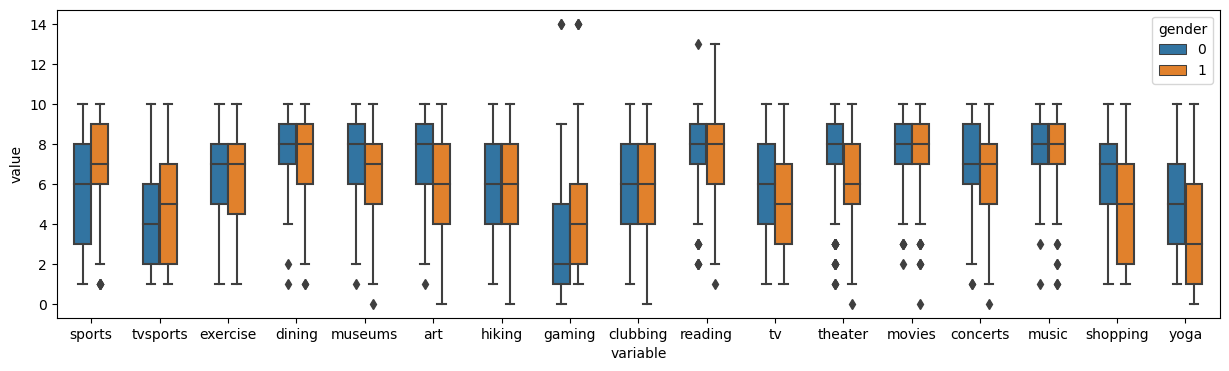

In [11]:
# evaluer la différence entre homme et femme par rapport aux score d'interest donné pour els difféents hobbies
df_rated_act_melt = pd.melt(df_rated_act, id_vars=['gender'], value_vars=['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art',
       'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',
       'concerts', 'music', 'shopping', 'yoga'])

plt.figure(figsize=(15,4))
sns.boxplot(x="variable", y="value", data=df_rated_act_melt, hue ='gender', width= 0.5)

In [42]:
df_corr_match = df.corr(numeric_only=True)["match"]
df_corr_dec = df.corr(numeric_only=True)["dec_o"]
df_corr_match_most = df_corr_match.loc[lambda x: x>0.25].sort_values(ascending=False)[1:]
df_corr_match_dec = df_corr_dec.loc[lambda x: x>0.25].sort_values(ascending=False)[1:]
display(df_corr_match_most.index)
display(df_corr_match_dec.index)

Index(['dec_o', 'dec', 'like_o', 'like', 'fun_o', 'fun', 'shar_o', 'shar',
       'attr_o', 'attr', 'prob_o', 'prob'],
      dtype='object')

Index(['match', 'like_o', 'attr_o', 'fun_o', 'shar_o', 'prob_o'], dtype='object')

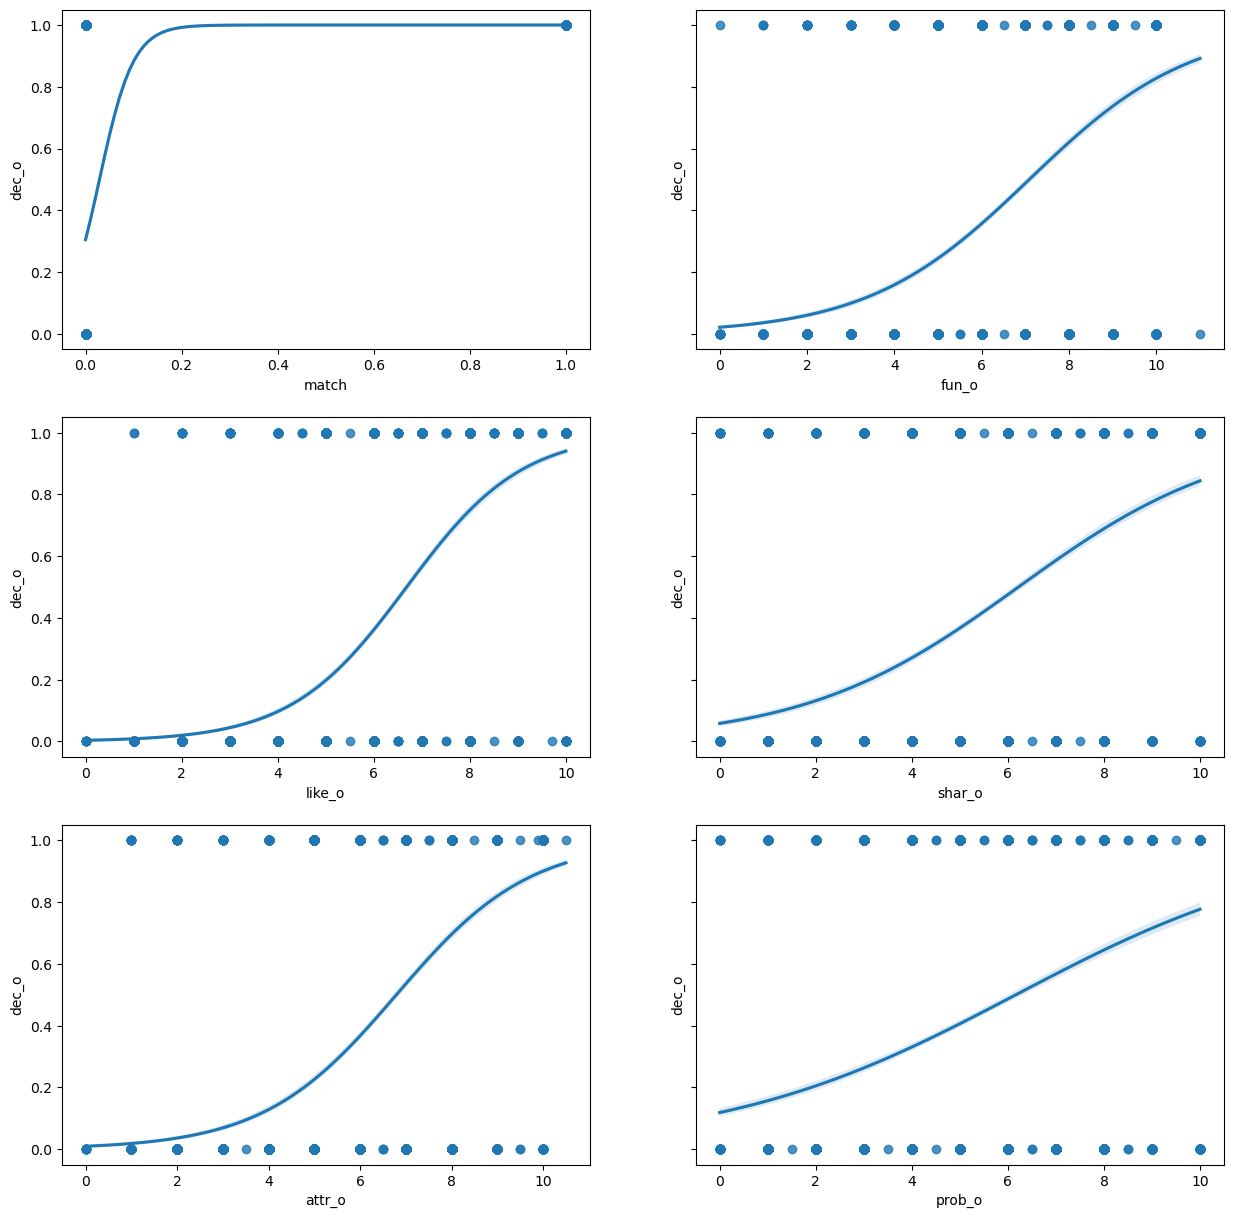

In [51]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15), sharey=True)
i = 0
y = 0
for col in df_corr_match_dec.index:
    sns.regplot(ax=ax[i,y], x=df[col], y=df.dec_o, data =df , logistic=True)
    if i==2:
        y+=1
        i=0
    else:
        i+=1
        
    

In [44]:
# regrouper les hommes et femmes  ayant le plus de match
df_f= df[df["gender"]==0]
df_h = df[df['gender']==1]
display(df_h.groupby('iid')['dec_o'].sum())
display(df_f.groupby('iid')['dec_o'].sum())
df_h = df_h.merge(df_h.groupby('iid')['dec_o'].sum().reset_index().rename(columns={'dec_o': 'count_dec_o'}), how='inner', on='iid')
df_f = df_f.merge(df_f.groupby('iid')['dec_o'].sum().reset_index().rename(columns={'dec_o': 'count_dec_o'}), how='inner', on='iid')


iid
11      4
12      4
13      4
14      8
15      3
       ..
548    10
549    10
550     6
551    10
552    15
Name: dec_o, Length: 277, dtype: int64

iid
1      5
2      6
3      5
4      6
5      3
      ..
526    3
527    3
528    5
529    3
530    3
Name: dec_o, Length: 274, dtype: int64

In [45]:
df_h_o =df_h[['iid', 'id', 'wave', "attr_o","sinc_o","intel_o","fun_o","amb_o","shar_o","like_o","prob_o","count_dec_o",'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art',
       'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',
       'concerts', 'music', 'shopping', 'yoga']]
df_f_o =df_f[['iid', 'id', 'wave', "attr_o","sinc_o","intel_o","fun_o","amb_o","shar_o","like_o","prob_o","count_dec_o",'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art',
       'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',
       'concerts', 'music', 'shopping', 'yoga']]
display(df_h_o.groupby('iid')['count_dec_o'].mean().reset_index().describe())
display(df_f_o.groupby('iid')['count_dec_o'].mean().reset_index().describe())

,iid,count_dec_o
count,277.000000,277.000000
mean,287.306859,5.519856
std,159.479122,3.757669
min,11.000000,0.000000
25%,158.000000,3.000000
50%,287.000000,5.000000
75%,424.000000,8.000000
max,552.000000,18.000000


,iid,count_dec_o
count,274.000000,274.000000
mean,266.153285,7.248175
std,159.093835,4.315881
min,1.000000,0.000000
25%,134.250000,4.000000
50%,262.500000,7.000000
75%,392.750000,10.000000
max,530.000000,20.000000


In [46]:
def Number_match(x):
    if x <5:
        return "few"
    elif x <10:
        return "some"
    elif x <15:
        return "lot"
    else:
        return "almost all"
        
        
df_h_o['Number_match'] = df_h_o['count_dec_o'].apply(Number_match)
df_f_o['Number_match'] = df_f_o['count_dec_o'].apply(Number_match)
df_h_nm = df_h_o.groupby('Number_match')[["attr_o","sinc_o","intel_o","fun_o","amb_o","shar_o","like_o","prob_o","count_dec_o", 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art',
       'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',
       'concerts', 'music', 'shopping', 'yoga']].mean().reset_index()
df_f_nm = df_f_o.groupby('Number_match')[["attr_o","sinc_o","intel_o","fun_o","amb_o","shar_o","like_o","prob_o","count_dec_o", 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art',
       'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies',
       'concerts', 'music', 'shopping', 'yoga']].mean().reset_index()

/tmp/ipykernel_8160/1013452083.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h_o['Number_match'] = df_h_o['count_dec_o'].apply(Number_match)
/tmp/ipykernel_8160/1013452083.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f_o['Number_match'] = df_f_o['count_dec_o'].apply(Number_match)


In [47]:
display(df_h_nm.iloc[:,0:10])
display(df_h_nm.iloc[:,10:])
display(df_f_nm.iloc[:,0:10])
display(df_f_nm.iloc[:,10:])
display(df_h_o[df_h_o['count_dec_o']>=15].describe())

,Number_match,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,count_dec_o
0,almost all,7.113924,6.936709,7.564103,6.746835,7.000000,6.121622,6.746835,5.057692,16.170732
1,few,5.056832,7.035737,7.372802,5.589873,6.788119,4.822873,5.400063,4.985136,2.270617
2,lot,6.982917,7.197889,7.547270,7.056604,7.109668,6.079755,6.606242,5.417112,11.327456
3,some,6.216473,7.124846,7.468750,6.579688,7.041856,5.646064,6.252313,5.355859,6.806663


,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,5.780488,3.902439,4.487805,8.268293,8.951220,8.682927,5.219512,4.975610,8.487805,7.804878,4.707317,7.146341,8.731707,9.463415,9.731707,6.926829,4.975610
1,6.337202,4.734881,5.802077,7.018937,6.483201,6.053146,5.752596,4.613317,5.175321,7.551008,5.070250,6.150886,7.726940,6.547343,7.398900,4.532682,3.835675
2,7.657431,5.404282,6.036524,7.618388,6.306045,6.115869,5.637280,3.954660,5.659950,7.457179,4.628463,5.680101,7.010076,6.367758,7.861461,5.016373,3.306045
3,7.474413,5.081276,6.360626,7.690548,6.609874,6.301023,5.285972,4.508128,5.832029,7.335942,4.806141,6.145093,7.812763,6.496689,7.854907,4.788682,3.682119


,Number_match,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,count_dec_o
0,almost all,7.488636,7.252174,7.439306,7.185345,6.792537,6.021739,7.009972,5.630747,16.422535
1,few,5.367291,7.183365,7.056926,5.913744,6.248283,4.925025,5.571228,4.943916,2.727518
2,lot,7.108247,7.346445,7.443495,6.910134,6.904980,5.899054,6.729539,5.375594,11.860185
3,some,6.533813,7.232426,7.313527,6.520408,6.607620,5.619944,6.283917,5.160996,6.999389


,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
0,6.549296,4.180282,7.380282,7.605634,7.059155,6.667606,6.109859,3.994366,5.864789,7.690141,5.292958,6.802817,7.800000,6.326761,7.538028,6.377465,4.053521
1,5.597995,4.563355,5.853236,8.143118,7.468551,7.395624,5.708295,3.398359,5.734731,7.624430,6.130356,7.851413,8.168642,7.298086,8.271650,6.568824,5.200547
2,6.329567,3.801318,6.948211,8.210923,7.473635,7.349341,6.530132,3.193032,6.078154,8.060264,5.640301,7.143126,8.145009,7.003766,7.641243,6.470810,4.978343
3,5.457480,4.123526,6.325264,8.227188,7.452514,7.135940,5.676598,3.156425,5.902545,8.046555,5.636872,7.603352,8.340782,7.208566,8.126629,6.497207,5.060211


,iid,id,wave,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,...,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga
count,82.000000,81.000000,82.000000,79.000000,79.000000,78.000000,79.000000,73.000000,74.000000,79.000000,...,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,402.634146,9.876543,15.560976,7.113924,6.936709,7.564103,6.746835,7.000000,6.121622,6.746835,...,4.975610,8.487805,7.804878,4.707317,7.146341,8.731707,9.463415,9.731707,6.926829,4.975610
std,177.868276,7.229078,6.809756,1.853530,2.059013,1.671687,1.944541,1.691482,2.176794,1.822005,...,2.652628,0.502927,1.047502,1.319257,1.580139,1.066305,0.891595,0.445797,1.245044,1.266624
min,99.000000,5.000000,4.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,8.000000,6.000000,3.000000,6.000000,7.000000,8.000000,9.000000,5.000000,3.000000
25%,366.000000,5.000000,14.000000,6.000000,6.000000,7.000000,6.000000,6.000000,5.000000,6.000000,...,1.000000,8.000000,8.000000,3.000000,6.000000,9.000000,8.000000,9.000000,5.000000,3.000000
50%,535.000000,6.000000,21.000000,7.000000,7.000000,8.000000,7.000000,7.000000,6.000000,7.000000,...,6.000000,8.000000,8.000000,4.000000,6.000000,9.000000,10.000000,10.000000,7.000000,6.000000
75%,552.000000,22.000000,21.000000,8.000000,8.000000,9.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,9.000000,8.000000,6.000000,7.000000,9.000000,10.000000,10.000000,8.000000,6.000000
max,552.000000,22.000000,21.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,8.000000,9.000000,9.000000,6.000000,10.000000,10.000000,10.000000,10.000000,8.000000,6.000000


In [14]:
df.groupby(['iid'])['gender'].max().reset_index().groupby('gender').count()

,iid
gender,
0,274
1,277


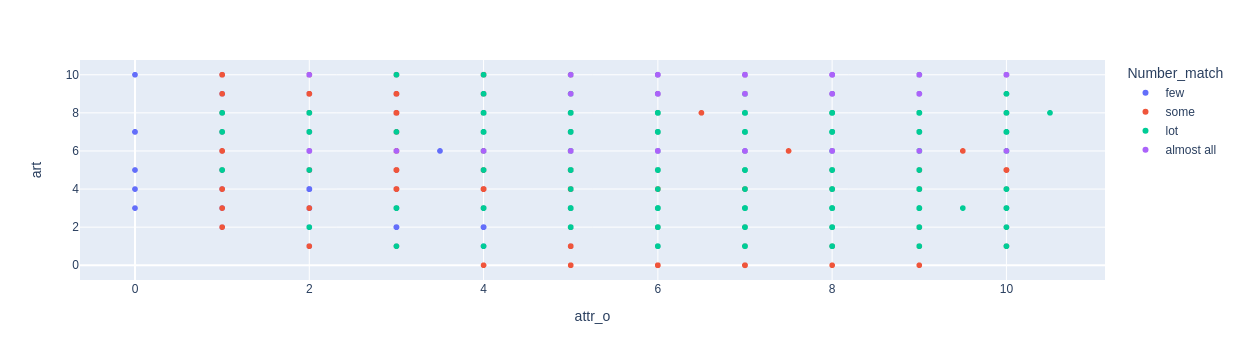

In [38]:
fig = px.scatter(df_h_o, x='attr_o', y='art',
              color='Number_match')
fig.show()

In [48]:
plot.figure(figsize = (5, 4))
plot_axes = plot.axes(projection = '3d')
print(type(plot_axes))
plot_axes.scatter3D(x1, y1, z1)
plot.show()

NameError: name 'plot' is not defined